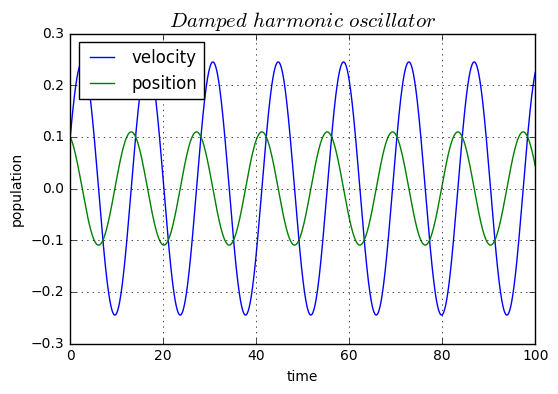

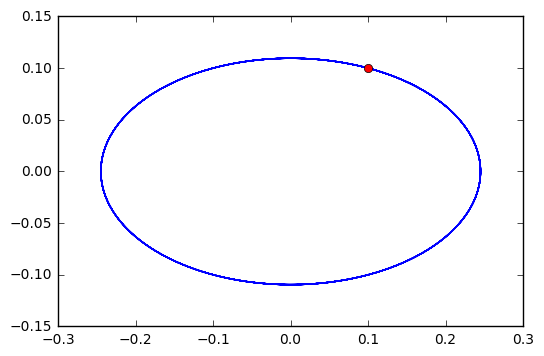

In [82]:
%matplotlib inline
import matplotlib
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import rc

k = 0.2
m = 1
b = 0.

omega = sqrt(k/m)

def func(z,t,k,m,b):
    x, y = z
    dzdt = [y, -(omega**2)*x - b*y]
    return dzdt

zinit = [0.1, 0.1]
t = np.linspace(0, 100, 5000)
z = odeint(func, zinit, t, args=(k,m,b))

plt.figure(1)
title = r"$Damped \ harmonic \ oscillator$"
plt.title(title,fontsize = 15)
plt.plot(t, z[:, 0],'b',label="velocity")
plt.plot(t, z[:, 1],'g',label="position")
plt.xlabel('time')
plt.ylabel('population')
plt.legend(loc='best')
plt.grid()


#nullclines

X = np.linspace(-1,1,100)
Y = np.linspace(-1,1,100)

X1 = 0*X

plt.figure(2)


plt.plot(z[:, 0],z[:, 1],'b')
plt.plot(0.1,0.1,'ro')


plt.show()